# c3

In [1]:
import sys
sys.path.append("/users/PAS0654/osu8354/root6_14_build/lib") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python2.7/site-packages")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib.pyplot as plt
#%jsroot on

Welcome to JupyROOT 6.14/06


## Import files and names

In [2]:
f1 = ROOT.TFile("/users/PCON0003/cond0068/ARA/AraRoot/analysis/calpul_box/A2_c3_412055Events_DistroCalPulses_Pol0_CP6_forFit.root")
vpol=f1.Get("Colz_Vpol")


## <font color='red'>No calpulser 5</font> 

## Calpulser 6

## Let's get the plots first

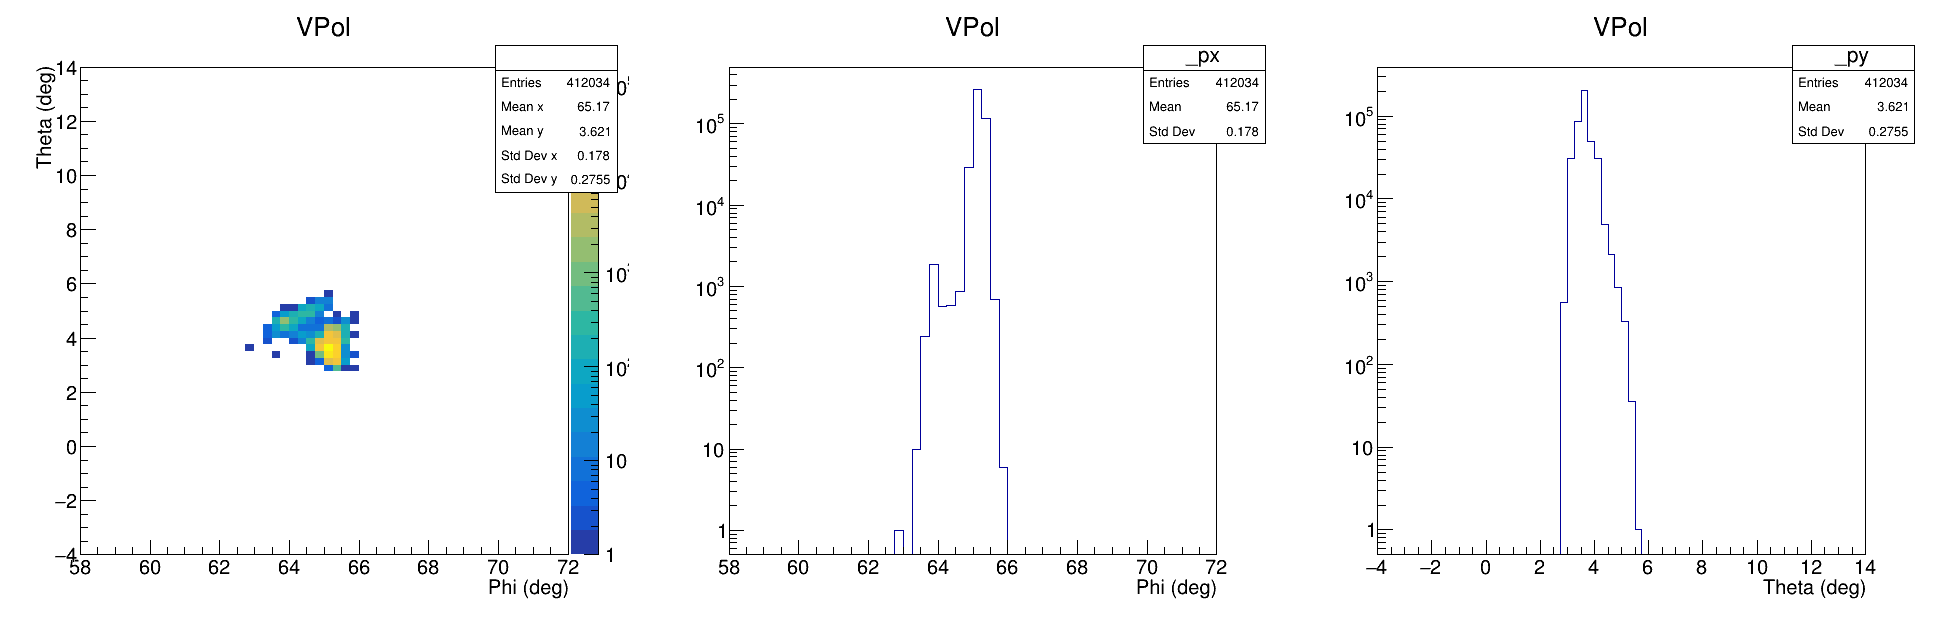

In [3]:
c=ROOT.TCanvas("","",650*3,650)
c.Divide(3,1)
c.cd(1)
vpol.Draw("COLZ")
gPad.SetLogz()
c.cd(2)
phi_proj_gaus=vpol.ProjectionX()
phi_proj_gaus.Draw()
gPad.SetLogy()
c.cd(3)
theta_proj_gaus=vpol.ProjectionY()
theta_proj_gaus.Draw()
gPad.SetLogy()
c.Draw()

## Fit the distros

In [146]:
phi_proj=vpol.ProjectionX()
theta_proj=vpol.ProjectionY()


j1 = ROOT.TF1("n1","gaus",1,3)
j2 = ROOT.TF1("n2","gaus",3,5)
j3 = ROOT.TF1("n2","gaus",4.5,6)

#phi.Fit("gaus","S")
total_th = ROOT.TF1("nstotal","gaus(3)+gaus(6)",1,6)
total_th.SetLineColor(4)
theta_proj.Fit(j1,"0R");
theta_proj.Fit(j2,"0RQ+");
theta_proj.Fit(j3,"0RQ+");
mean_th=np.zeros(9)
for i in range(0,3):
    mean_th[i]=j1.GetParameter(i)
for i in range(3,6):
    mean_th[i]=j2.GetParameter(i-3)
for i in range(6,9):
    mean_th[i]=j3.GetParameter(i-6)
total_th.SetParameters(mean_th);
allfit_theta=theta_proj.Fit(total_th,"ESLRQ+")

g1 = ROOT.TF1("m1","gaus",62,64)
g2 = ROOT.TF1("m2","gaus",62,70)
#g3 = ROOT.TF1("m2","gaus",62,65)

#The total is the sum of the three, each has 3 parameters
total = ROOT.TF1("mstotal","gaus(0)+gaus(3)",60,72)
total.SetLineColor(4)
phi_proj.Fit(g1,"0R");
phi_proj.Fit(g2,"0RQ+");
phi_proj.Fit(g3,"0RQ+");

mean=np.zeros(6)
for i in range(0,3):
    mean[i]=g1.GetParameter(i)
for i in range(3,6):
    mean[i]=g2.GetParameter(i-3)
# for i in range(6,9):
#     mean[i]=g3.GetParameter(i-6)
total.SetParameters(mean);
allfit=phi_proj.Fit(total,"ELRQS+")


 FCN=1.82344e-10 FROM HESSE     STATUS=NOT POSDEF     16 CALLS          86 TOTAL
                     EDM=3.64322e-10    STRATEGY= 1      ERR MATRIX NOT POS-DEF
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.23665e+02   4.57616e+02   2.99692e-03   8.79986e-07
   2  Mean         3.05744e+00   2.18556e-01   1.43351e-06  -1.83997e-03
   3  Sigma        2.51279e-01   2.93015e-01   2.62707e-06   1.00418e-03
 FCN=0.9989 FROM MIGRAD    STATUS=CONVERGED     362 CALLS         363 TOTAL
                     EDM=1.21847e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.89592e+03   1.97796e+03   7.29217e-02  -1.17909e-05
   2  Mean         6.41983e+01   1.03131e-01   3.06121e-05   4.14866e-01
   3  Sigma        2.33923e-01

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


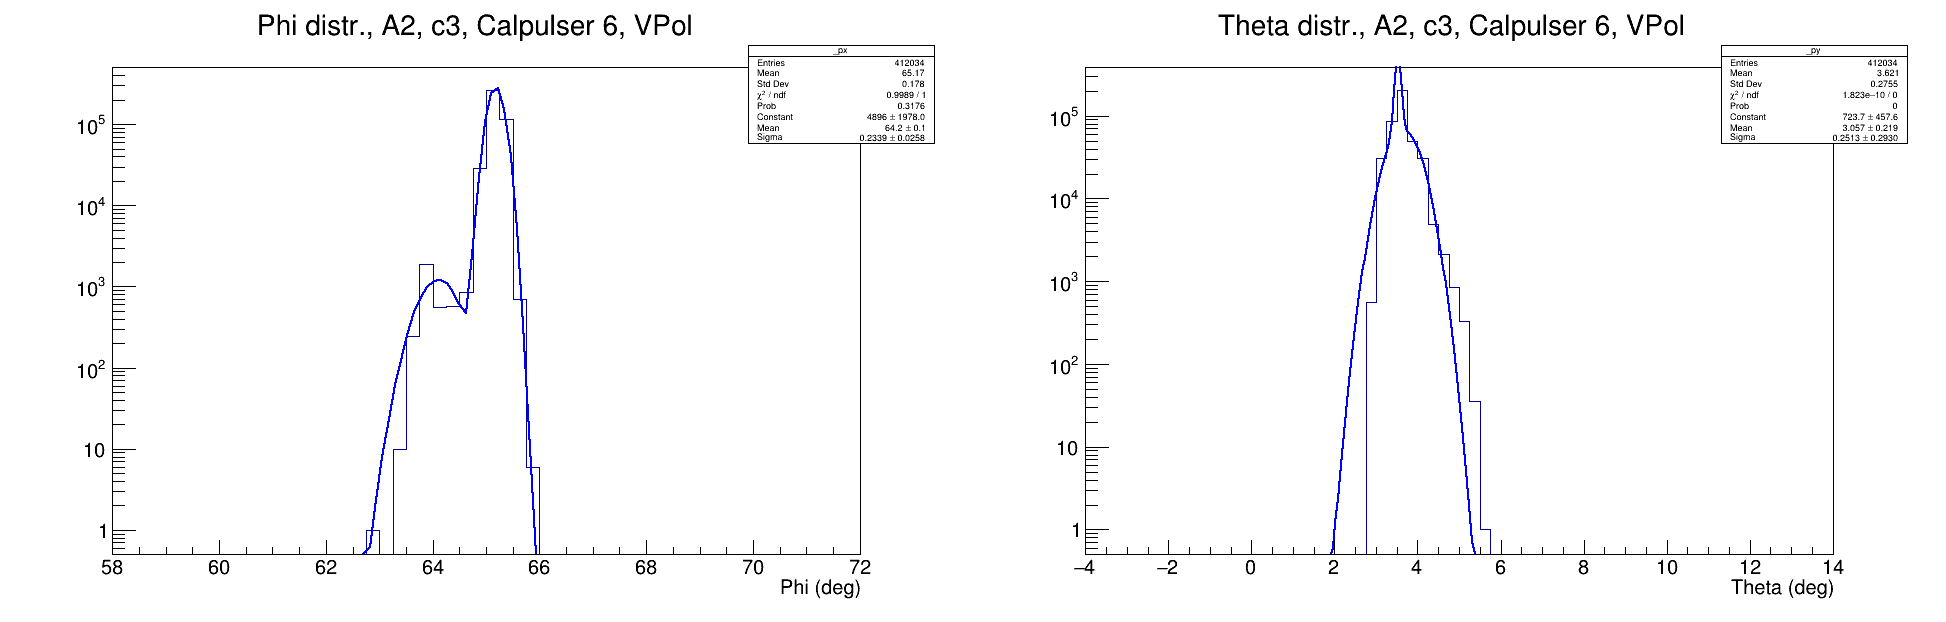

In [152]:
c=ROOT.TCanvas("","",650*3,650)
phi_int=total.Integral(-27,-21)
th_int=total_th.Integral(-30,-18)
name_ph="Phi Projection Near peak, Integral="+ str(phi_int)
name_th="Theta Projection Near peak, Integral="+ str(th_int)
c.Divide(2,1)

c.cd(1)
phi_proj.Draw()
gPad.SetLogy()
gStyle.SetOptFit(1111)
phi_proj.SetTitle("Phi distr., A2, c3, Calpulser 6, VPol")
c.cd(2)
theta_proj.SetTitle("Theta distr., A2, c3, Calpulser 6, VPol")
theta_proj.Draw()
gPad.SetLogy()
gStyle.SetOptFit(1111)
c.Draw()